In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

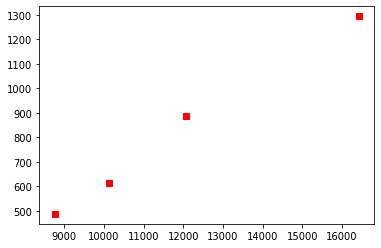

In [4]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612, 887, 1294])
plt.scatter(x_data, y_data, color = 'r', marker = 's')
plt.show()

In [5]:
weight_0 = np.random.sample(5)
weight_1 = np.random.sample(5)

In [7]:
y_hat_list = []
for w0, w1 in zip(weight_0, weight_1):
    y_hat_list.append(w0 + w1*x_data)

y_hat_list

[array([ 7608.94028087,  8801.64201042, 10492.09908669, 14272.60740936]),
 array([3335.77168352, 3858.58874158, 4599.59529291, 6256.76924532]),
 array([ 7687.32161901,  8892.3120411 , 10600.18630286, 14419.64611127]),
 array([3542.73153922, 4098.00714805, 4885.01831686, 6645.07618258]),
 array([ 8173.02399633,  9454.03153718, 11269.64746907, 15330.05884399])]

In [101]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


63

In [103]:
raw_X = df["X"].values.reshape(-1, 1) # 'X' column을 maxrix로 변환
y = df["Y"].values

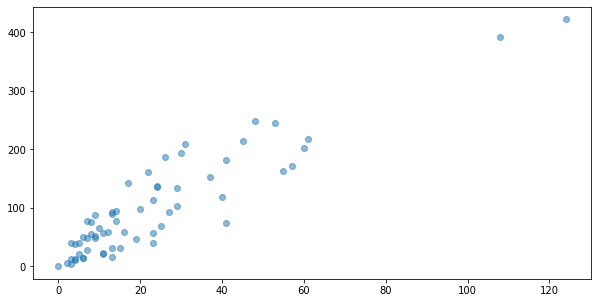

In [104]:
plt.figure(figsize=(10,5))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [105]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [106]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis = 1)  # 상수항을 위해 1 column을 붙여줌
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [107]:
len(X)

63

In [108]:
w = np.random.normal((2,1))
w

array([1.25471024, 2.04642077])

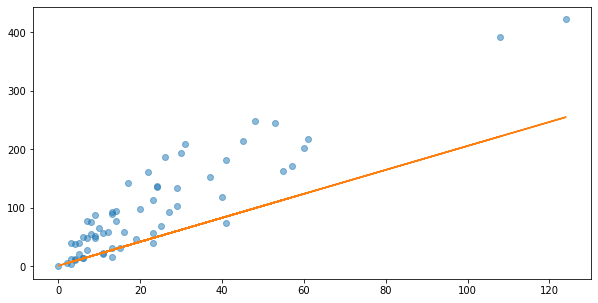

In [109]:
plt.figure(figsize=(10,5))

y_predict = np.dot(X, w)
plt.plot(raw_X, y, "o", alpha = 0.5)
plt.plot(raw_X, y_predict)

In [110]:
def hypothesis_function(X, theta):
    return X.dot(theta)

def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)  

In [111]:
h = hypothesis_function(X, w)
cost_function(h, y)

2380.081906670229

In [112]:
def gradient_descent(X, y, w, alpha, iteration):
    theta = w
    m = len(y)
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])
        
        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
            
    return theta, theta_list, cost_list

In [113]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print("cost:", cost)

theta: [19.87529035  3.41639727]
cost: 625.374556837606


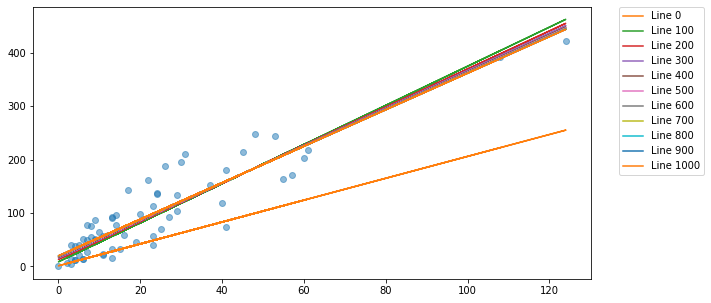

In [122]:
plt.figure(figsize=(10,5))

y_predict_step=np.dot(X, np.array(theta_list).T)
plt.plot(raw_X, y, "o", alpha=0.5)
for i in range(0, len(cost_list), 100): # 위에서 저장한 cost_list
    plt.plot(raw_X, y_predict_step[:, i], label = 'Line %d' %i)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()